In [1]:
import numpy as np

from sklearn.decomposition import PCA

# MNIST

In [2]:
from mnist import MNIST

In [3]:
mnist_loader = MNIST("../data/mnist/")
mnist_loader.gz = True

### Load MNIST

In [4]:
X, y = mnist_loader.load_training()
_X, _y = mnist_loader.load_testing()

In [5]:
X = np.array(X, dtype='float32') / 255
y = np.array(y, dtype='int16')
_X = np.array(_X, dtype='float32') / 255
_y = np.array(_y, dtype='int16')

### Transform

In [6]:
mnist_pca_20 = PCA(n_components=20, random_state=666)
mnist_pca_5 = PCA(n_components=5, random_state=666)

In [7]:
%%time
mnist_pca_20.fit(X)

CPU times: user 2.47 s, sys: 241 ms, total: 2.71 s
Wall time: 1.53 s


PCA(copy=True, iterated_power='auto', n_components=20, random_state=666,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
%%time
mnist_pca_5.fit(X)

CPU times: user 2.02 s, sys: 226 ms, total: 2.24 s
Wall time: 1.27 s


PCA(copy=True, iterated_power='auto', n_components=5, random_state=666,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
mnist_pca_20.components_

array([[ 6.9702035e-09,  8.3954772e-09, -2.1823453e-10, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-2.4122533e-08, -2.2426992e-08,  3.1748457e-09, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 3.3037963e-09,  1.5345503e-08,  6.3899614e-09, ...,
        -0.0000000e+00, -0.0000000e+00, -0.0000000e+00],
       ...,
       [ 1.9280042e-08,  1.0291119e-08, -9.6131914e-10, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 6.2718399e-08,  1.2221625e-08,  3.1436677e-08, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 2.4748713e-08, -1.7609599e-08,  8.1631759e-09, ...,
        -0.0000000e+00, -0.0000000e+00, -0.0000000e+00]], dtype=float32)

In [10]:
mnist_pca_20.explained_variance_ratio_

array([0.09704716, 0.07095958, 0.06169116, 0.05389445, 0.04868825,
       0.04312254, 0.03271944, 0.02883912, 0.02762044, 0.02357013,
       0.021092  , 0.02023   , 0.01715828, 0.01692122, 0.01578634,
       0.01482938, 0.01324532, 0.01276863, 0.01186491, 0.01152439],
      dtype=float32)

In [11]:
mnist_pca_5.explained_variance_ratio_

array([0.09704709, 0.07095964, 0.06169123, 0.05389447, 0.04868815],
      dtype=float32)

In [12]:
X_transformed = mnist_pca_20.transform(X)
_X_transformed = mnist_pca_20.transform(_X)

X_transformed_5 = mnist_pca_5.transform(X)
_X_transformed_5 = mnist_pca_5.transform(_X)

### Predict LR

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
mnist_lr = LogisticRegression(penalty='l2')

In [15]:
%%time
# 20 features
mnist_lr.fit(X_transformed, y)

CPU times: user 7.83 s, sys: 5.65 ms, total: 7.84 s
Wall time: 7.87 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
yhat = mnist_lr.predict(X_transformed)
print('20 - Train acc:', sum(yhat == y)/len(y))
_yhat = mnist_lr.predict(_X_transformed)
print('20 - Test acc:', sum(_yhat == _y)/len(_y))

20 - Train acc: 0.8603833333333334
20 - Test acc: 0.8679


In [17]:
%%time
# 5 features
mnist_lr.fit(X_transformed_5, y)

CPU times: user 2.33 s, sys: 930 µs, total: 2.33 s
Wall time: 2.34 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
yhat = mnist_lr.predict(X_transformed_5)
print('5 - Train acc:', sum(yhat == y)/len(y))
_yhat = mnist_lr.predict(_X_transformed_5)
print('5 - Test acc:', sum(_yhat == _y)/len(_y))

5 - Train acc: 0.6434666666666666
5 - Test acc: 0.6526


### Predict DT

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
mnist_tree = DecisionTreeClassifier(random_state=666)

In [21]:
%%time
# 20 features
mnist_tree.fit(X_transformed, y)

CPU times: user 3.52 s, sys: 0 ns, total: 3.52 s
Wall time: 3.53 s


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=666,
            splitter='best')

In [22]:
yhat = mnist_tree.predict(X_transformed)
print('20 - Train acc:', sum(yhat == y)/len(y))
_yhat = mnist_tree.predict(_X_transformed)
print('20 - Test acc:', sum(_yhat == _y)/len(_y))

20 - Train acc: 1.0
20 - Test acc: 0.8435


In [23]:
%%time
# 5 features
mnist_tree.fit(X_transformed_5, y)

CPU times: user 711 ms, sys: 33 µs, total: 711 ms
Wall time: 711 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=666,
            splitter='best')

In [24]:
yhat = mnist_tree.predict(X_transformed_5)
print('5 - Train acc:', sum(yhat == y)/len(y))
_yhat = mnist_tree.predict(_X_transformed_5)
print('5 - Test acc:', sum(_yhat == _y)/len(_y))

5 - Train acc: 1.0
5 - Test acc: 0.6727


# SpamBase

In [26]:
spam_data = np.loadtxt('../data/spam/spambase.data', delimiter=',')

In [27]:
y_all = spam_data[:, -1]
spam_data = spam_data[:, :-1]

In [28]:
# train - 3.5k test - 1.1k
X, y = spam_data[:3500], y_all[:3500]
_X, _y = spam_data[3500:], y_all[3500:]

### Transform and predict

In [29]:
from sklearn.linear_model import LogisticRegression

In [39]:
%%time
test_acc = [0]
train_acc = [0]
spam_lr = LogisticRegression(penalty='l2')
for i in range(1, X.shape[1] + 1):
    spam_pca = PCA(n_components=i)
    X_transformed = spam_pca.fit_transform(X)
    _X_transformed = spam_pca.transform(_X)
    spam_lr.fit(X_transformed, y)
    _yhat = spam_lr.predict(_X_transformed)
    test_acc.append(sum(_yhat == _y)/len(_y))
    yhat = spam_lr.predict(X_transformed)
    train_acc.append(sum(yhat == y)/len(y))

CPU times: user 12.8 s, sys: 459 ms, total: 13.2 s
Wall time: 6.75 s


In [40]:
np.argsort(test_acc)[::-1]

array([ 1, 41, 42, 44,  2, 43, 37, 38, 45, 35, 36, 40,  3, 33, 39, 34, 32,
       50, 54, 47, 48, 49, 53, 57, 46, 51, 55, 56, 31, 30, 52, 29, 24, 27,
       20, 21, 28, 25, 23, 19, 26, 22, 18, 17, 16, 15, 14, 13,  4, 12,  7,
        6,  5, 10,  8, 11,  9,  0])

## n_c = 1

In [32]:
spam_pca = PCA(n_components=1)
X_transformed = spam_pca.fit_transform(X)
_X_transformed = spam_pca.transform(_X)

In [33]:
spam_lr = LogisticRegression(penalty='l2')

In [34]:
%time
spam_lr.fit(X_transformed, y)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
yhat = spam_lr.predict(X_transformed)
print('Train acc:', sum(yhat == y)/len(y))
_yhat = spam_lr.predict(_X_transformed)
print('Test acc:', sum(_yhat == _y)/len(_y))

Train acc: 0.6325714285714286
Test acc: 0.8673932788374206


### n_c = 44

In [36]:
spam_pca = PCA(n_components=44)
X_transformed = spam_pca.fit_transform(X)
_X_transformed = spam_pca.transform(_X)

In [37]:
%time
spam_lr.fit(X_transformed, y)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
yhat = spam_lr.predict(X_transformed)
print('Train acc:', sum(yhat == y)/len(y))
_yhat = spam_lr.predict(_X_transformed)
print('Test acc:', sum(_yhat == _y)/len(_y))

Train acc: 0.932
Test acc: 0.8528610354223434


### Some visuals

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

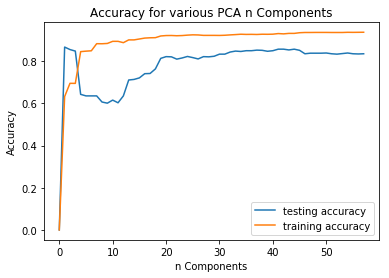

In [47]:
plt.plot(test_acc, label='testing accuracy')
plt.plot(train_acc, label='training accuracy')
plt.xlabel('n Components')
plt.ylabel('Accuracy')
plt.title('Accuracy for various PCA n Components')
plt.legend()